In [ ]:
import numpy as np
from tabulate import tabulate
import pandas as pd
from sklearn.cluster import KMeans
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv("food_cleaned_data.csv")
df1

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Spending Score (1-100)
0,2.400,2,1,430,3,315,1,none,we dont have comfort,9,...,1,1,1165,345,car racing,5,1,1315,187,39
1,3.654,1,1,610,3,420,2,"chocolate, chips, ice cream","Stress, bored, anger",1,...,1,2,725,690,Basketball,4,2,900,155,81
2,3.300,1,1,720,4,420,2,"frozen yogurt, pizza, fast food","stress, sadness",1,...,2,5,1165,500,none,5,1,900,158,6
3,3.200,1,1,430,3,420,2,"Pizza, Mac and cheese, ice cream",Boredom,2,...,2,5,725,690,NaN,3,1,1315,158,77
4,3.500,1,1,720,2,420,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1,...,1,4,940,500,Softball,4,2,760,190,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.500,1,1,610,4,420,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,3,...,1,5,940,500,Softball,5,1,1315,156,56
121,3.000,1,1,265,2,315,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,3,...,1,4,940,500,basketball,5,2,1315,180,40
122,3.882,1,1,720,3,420,1,"rice, potato, seaweed soup",sadness,3,...,2,5,580,690,none,4,2,1315,120,58
123,3.000,2,1,720,4,420,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",3,...,2,1,940,500,NaN,3,1,1315,135,91


In [ ]:
# Get the column names
column_names = df1.columns.tolist()

print("Column Names:")
print(column_names)

Column Names:
['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day', 'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons', 'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded1', 'cuisine', 'diet_current', 'diet_current_coded', 'drink', 'eating_changes', 'eating_changes_coded', 'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food', 'exercise', 'father_education', 'father_profession', 'fav_cuisine', 'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal', 'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food', 'italian_food', 'life_rewarding', 'marital_status', 'meals_dinner_friend', 'mother_education', 'mother_profession', 'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out', 'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food', 'tortilla_calories', 'turkey_calories', 'type_sports', 'veggies_day', 'vitamins', 'waffle_c

In [ ]:
#data cleaning and extracting relevant features
df=df1[["cook","diet_current_coded","eating_out","sports","exercise","fav_cuisine_coded","on_off_campus","pay_meal_out","fav_food","fruit_day","income"]]
df.dropna(axis=0,inplace=True)
df.to_csv("food_choices.csv")
df

,cook,diet_current_coded,eating_out,sports,exercise,fav_cuisine_coded,on_off_campus,pay_meal_out,fav_food,fruit_day,income
0,2,1,3,1,1,3,1,2,1,5,5
1,3,2,2,1,1,1,1,4,1,4,4
2,1,3,2,2,2,1,2,3,3,5,6
3,2,2,2,2,3,3,1,2,1,4,6
4,1,2,2,1,1,1,1,4,3,4,6
...,...,...,...,...,...,...,...,...,...,...,...
120,3,2,2,1,2,1,3,4,1,5,4
121,3,2,4,1,2,2,1,4,1,4,2
122,3,2,3,2,2,4,1,4,1,4,2
123,3,1,5,2,1,1,1,3,3,5,4


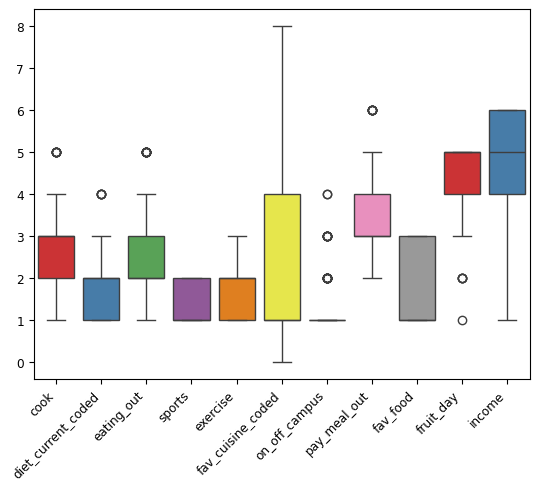

In [ ]:
#Plotting Boxplot for cleaned data
sns.boxplot(data=df, palette="Set1").tick_params(labelsize=8.7)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#K-Means clustering on cleaned data
k = 3
kmeans = KMeans(n_clusters = k, random_state=0).fit(df)
df['Cluster']=kmeans.labels_

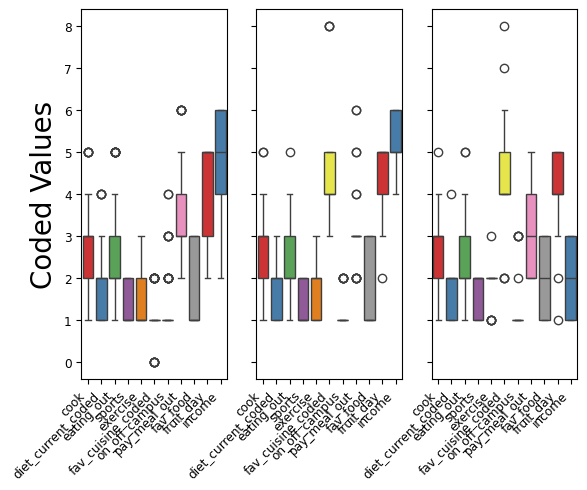

In [ ]:
#Plotting Boxplot for optimal K value (K=3)
fig, axes = plt.subplots(1, k, sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=20)

for i in range(k):
     plt.sca(axes[i])
     plt.xticks(rotation=45,ha='right')
     #sns.boxplot(palette="Set1",data = df[df['Cluster'] == i].drop('Cluster',1), ax=axes[i]).tick_params(labelsize=8.7)
     sns.boxplot(palette="Set1", data=df[df['Cluster'] == i].drop(columns=['Cluster']), ax=axes[i]).tick_params(labelsize=8.7)

plt.show()

KMeans(n_clusters=1, random_state=60)
KMeans(n_clusters=2, random_state=60)
KMeans(n_clusters=3, random_state=60)
KMeans(n_clusters=4, random_state=60)
KMeans(n_clusters=5, random_state=60)
KMeans(n_clusters=6, random_state=60)
KMeans(n_clusters=7, random_state=60)
KMeans(random_state=60)
KMeans(n_clusters=9, random_state=60)
KMeans(n_clusters=10, random_state=60)


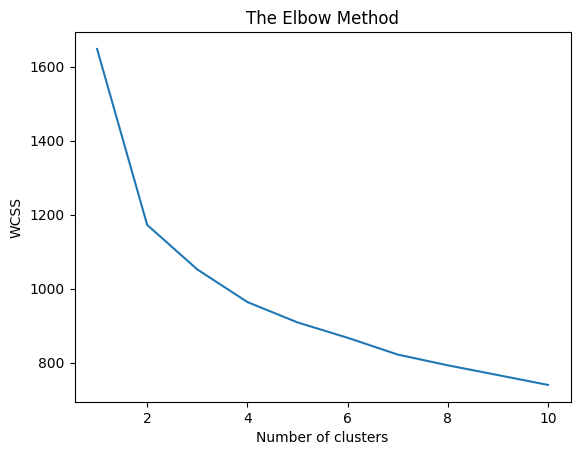

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 60)
    res = kmeans.fit(df)
    print(res)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()